<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import os
import numpy as np
import tensorflow as tf

2023-03-31 18:01:36.711363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 18:01:36.893364: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-31 18:01:36.893412: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-31 18:01:37.605803: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [5]:
#tf.enable_eager_execution()
np.random.seed(0)
#tf.set_random_seed(0)
tf.random.set_seed(0)

Building model

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
import os
print (os.getcwd())

/home/ajita/Documents/data_integration/scDREAMER_tensorflow2/supervised


In [8]:
#data_path = "/home/ajita/Documents/data_integration/Lung/Lung_atlas_public.h5ad"
data_path = "/home/ajita/Documents/data_integration/Immune/Immune_Human_NA_0.5.h5ad"

In [9]:
name = "Immune_Human"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    }    
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                } 

2023-03-31 18:01:40.186420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 18:01:40.424763: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-31 18:01:40.424874: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-31 18:01:40.424918: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: li

came in load_gene
updated hvg
here [2 4 1 ... 1 2 2]
Shape self.data_train: (33506, 2000)
Shape self.data_test: (33506, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2010), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.
decoder input shape  Tensor("concat_2:0", shape=(?, 20), dtype=float32)
inferred check Tensor("Max:0", shape=(), dtype=float32)
entering in for loop 1   512  -- > 256
KL gaussian z Tensor("mul_13:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_12:0", shape=(?,), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cluster DRA on DataSet /home/ajita/Documents/data_integration/Immune/Immune_Human_NA_0.5.h5ad ... 


2023-03-31 18:02:18.931047: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


Epoch : [0] ,  a_loss = 395.3496, d_loss: -0.0013 , db_loss: 2.2140
latent_matrix shape (33506, 10)
(33506,)


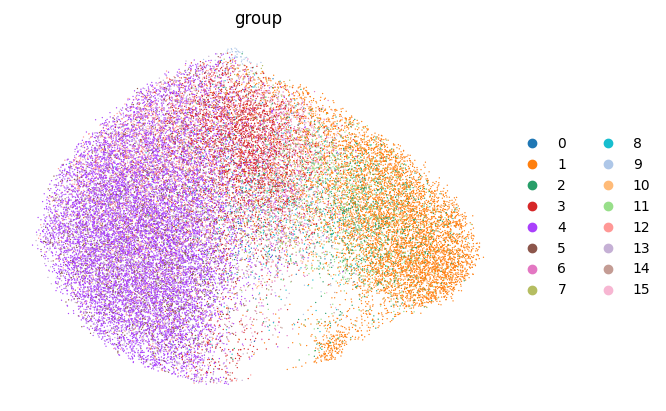

None


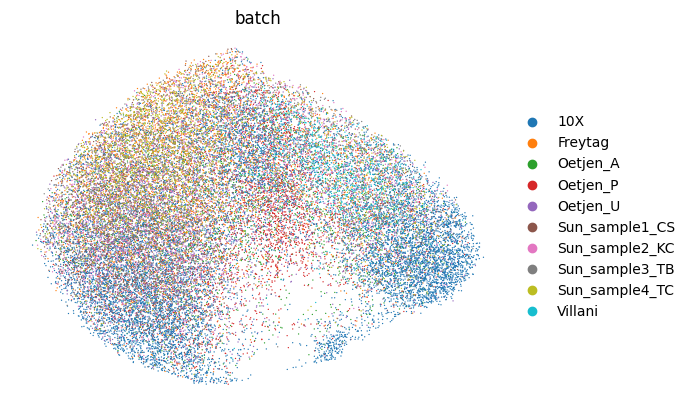

None


OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
OpenBLAS warning: precompiled NUM_THREAD

Computing NMI ...
Done !
NMI = 0.27692145433525744
Epoch : [1] ,  a_loss = 353.2419, d_loss: -0.0006 , db_loss: 3.1807
Epoch : [2] ,  a_loss = 482.8024, d_loss: -0.0007 , db_loss: 1.1414
Epoch : [3] ,  a_loss = 396.9760, d_loss: -0.0004 , db_loss: 2.3941
Epoch : [4] ,  a_loss = 347.6144, d_loss: -0.0003 , db_loss: 1.6813
Epoch : [5] ,  a_loss = 343.1376, d_loss: -0.0003 , db_loss: 2.6706
Epoch : [6] ,  a_loss = 469.6460, d_loss: -0.0002 , db_loss: 1.0674
Epoch : [7] ,  a_loss = 337.0471, d_loss: -0.0002 , db_loss: 1.5766
Epoch : [8] ,  a_loss = 447.0846, d_loss: -0.0002 , db_loss: 0.7876
Epoch : [9] ,  a_loss = 431.0637, d_loss: -0.0001 , db_loss: 1.2689
Epoch : [10] ,  a_loss = 374.9024, d_loss: -0.0002 , db_loss: 1.5191
Epoch : [11] ,  a_loss = 339.1648, d_loss: -0.0001 , db_loss: 1.8592
Epoch : [12] ,  a_loss = 418.2938, d_loss: -0.0002 , db_loss: 1.1679
Epoch : [13] ,  a_loss = 409.9521, d_loss: -0.0001 , db_loss: 0.5751
Epoch : [14] ,  a_loss = 465.9092, d_loss: -0.0001 , db_loss:

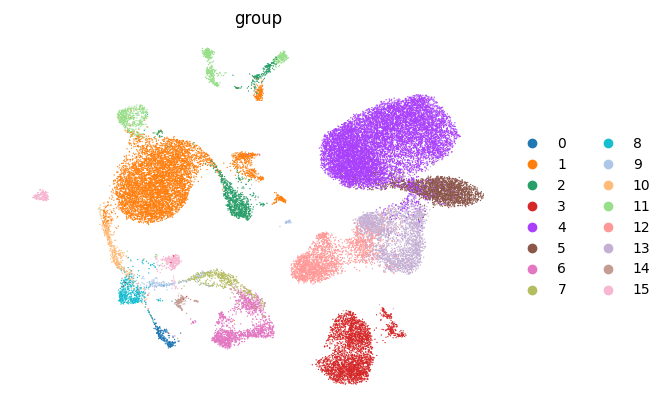

None


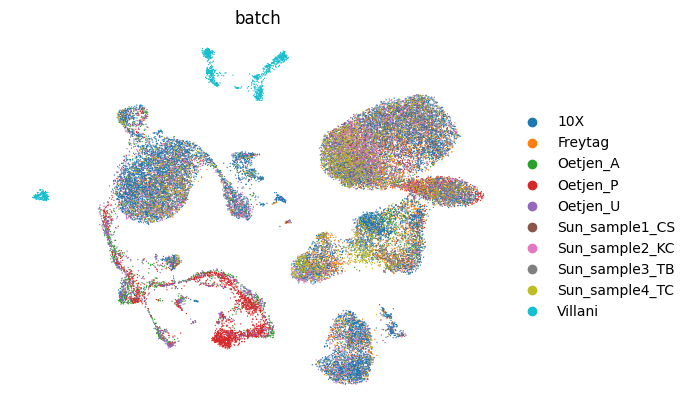

None
Computing NMI ...
Done !
NMI = 0.7895854796918543
Epoch : [51] ,  a_loss = 311.8184, d_loss: -0.0596 , db_loss: 2.1426
Epoch : [52] ,  a_loss = 376.2536, d_loss: -0.0652 , db_loss: 1.0756
Epoch : [53] ,  a_loss = 585.9398, d_loss: -0.0570 , db_loss: 0.0005
Epoch : [54] ,  a_loss = 285.4139, d_loss: -0.0642 , db_loss: 2.4128
Epoch : [55] ,  a_loss = 302.7102, d_loss: -0.0559 , db_loss: 2.4223
Epoch : [56] ,  a_loss = 312.2401, d_loss: -0.0575 , db_loss: 1.6686
Epoch : [57] ,  a_loss = 290.2088, d_loss: -0.1076 , db_loss: 2.4446
Epoch : [58] ,  a_loss = 279.9496, d_loss: -0.0743 , db_loss: 2.2611
Epoch : [59] ,  a_loss = 421.8547, d_loss: -0.0854 , db_loss: 0.7183
Epoch : [60] ,  a_loss = 293.2623, d_loss: -0.0669 , db_loss: 1.9886
Epoch : [61] ,  a_loss = 422.4498, d_loss: -0.0723 , db_loss: 0.9067
Epoch : [62] ,  a_loss = 409.7199, d_loss: -0.0776 , db_loss: 0.7939
Epoch : [63] ,  a_loss = 370.1059, d_loss: -0.1063 , db_loss: 1.4364
Epoch : [64] ,  a_loss = 422.3130, d_loss: -0.09

In [ ]:

import model_scanvi_semisupervised as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()
    